# Chapter 9: MTCNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_5/Chapter9

/content/drive/MyDrive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_5/Chapter9


In [6]:
 import warnings 
 warnings.filterwarnings('ignore')

In [7]:
 import tensorflow as tf

In [8]:
!pip install mtcnn
# check tensorflow => len mang search mtcnn tuong ung

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.0 MB/s 


In [9]:
 import mtcnn

In [10]:
 mtcnn.__version__

'0.1.0'

In [11]:
from mtcnn.mtcnn import MTCNN 
import cv2
from skimage import io
import matplotlib.pyplot as plt

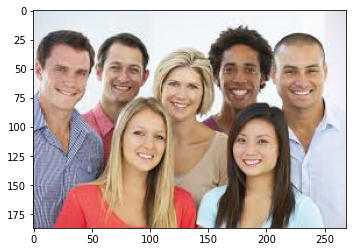

In [13]:
image = io.imread("FaceDetection_MTCNN/group_of_people.jpg") 
plt.imshow(image)

In [14]:
detector = MTCNN()
result = detector.detect_faces(image)

In [15]:
result

[{'box': [159, 31, 36, 51],
  'confidence': 0.9999665021896362,
  'keypoints': {'left_eye': (169, 51),
   'mouth_left': (167, 68),
   'mouth_right': (186, 68),
   'nose': (177, 61),
   'right_eye': (186, 51)}},
 {'box': [60, 31, 33, 47],
  'confidence': 0.9999501705169678,
  'keypoints': {'left_eye': (70, 49),
   'mouth_left': (68, 64),
   'mouth_right': (85, 66),
   'nose': (78, 60),
   'right_eye': (86, 51)}},
 {'box': [79, 89, 34, 47],
  'confidence': 0.999943733215332,
  'keypoints': {'left_eye': (91, 105),
   'mouth_left': (88, 122),
   'mouth_right': (105, 124),
   'nose': (100, 116),
   'right_eye': (108, 109)}},
 {'box': [9, 32, 38, 50],
  'confidence': 0.9998481273651123,
  'keypoints': {'left_eye': (24, 50),
   'mouth_left': (20, 67),
   'mouth_right': (37, 70),
   'nose': (32, 63),
   'right_eye': (41, 54)}},
 {'box': [112, 49, 33, 43],
  'confidence': 0.9998034834861755,
  'keypoints': {'left_eye': (121, 63),
   'mouth_left': (118, 78),
   'mouth_right': (135, 81),
   'nose

In [18]:
# first face information
bounding_box = result[0]['box'] 
keypoints = result[0]['keypoints'] 
print(bounding_box) 
print(keypoints)

[159, 31, 36, 51]
{'left_eye': (169, 51), 'right_eye': (186, 51), 'nose': (177, 61), 'mouth_left': (167, 68), 'mouth_right': (186, 68)}


In [ ]:
# https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
# https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/

In [19]:
for person in result:
  bounding_box = person['box']
  keypoints = person['keypoints']
  # ve bouding box
  # (hinh, diem dau, diem cuoi, mau sac, do day duong) 
  cv2.rectangle(image, # hinh
              (bounding_box[0], bounding_box[1]), # diem dau 
              (bounding_box[0]+bounding_box[2],
                bounding_box[1] + bounding_box[3]), # diem cuoi 
              (0,0,255), 1) # mau sac, do day
  # ve diem dai dien cho mat, mui mieng
  # ve diem: hinh, vi tri, ban kinh, mau sac, do dam net 
  cv2.circle(image,(keypoints['left_eye']), 2, (0,0,255), 1) # hinh, vi tri, ban kinh, mau sac, do dam net
  cv2.circle(image,(keypoints['right_eye']), 2, (0,0,255), 1) 
  cv2.circle(image,(keypoints['nose']), 2, (0,0,255), 1) 
  cv2.circle(image,(keypoints['mouth_left']), 2, (0,0,255), 1) 
  cv2.circle(image,(keypoints['mouth_right']), 2, (0,0,255), 1)

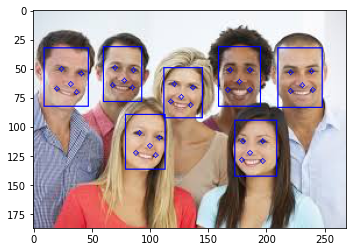

In [20]:
plt.imshow(image)
plt.show()

In [ ]:
# # Video face detection
# cap = cv2.VideoCapture(0)
# while True:
# #
# # # # # #
#Capture frame-by-frame
#__, frame = cap.read()
#Use MTCNN to detect faces
#result = detector.detect_faces(frame)
#if result != []:
#    for person in result:
#        bounding_box = person['box']
#        keypoints = person['keypoints']
#cv2.rectangle(frame,
#              (bounding_box[0], bounding_box[1]),
#              (bounding_box[0]+bounding_box[2],
#               bounding_box[1] + bounding_box[3]),
#              (0,155,255),
# 2)
#             cv2.circle(frame,(keypoints['left_eye']), 2, (0,155,255), 2)
#             cv2.circle(frame,(keypoints['right_eye']), 2, (0,155,255), 2)
#             cv2.circle(frame,(keypoints['nose']), 2, (0,155,255), 2)
#             cv2.circle(frame,(keypoints['mouth_left']), 2, (0,155,255), 2)
#             cv2.circle(frame,(keypoints['mouth_right']), 2, (0,155,255), 2)
#     #display resulting frame
#     cv2.imshow('frame',frame)
#     if cv2.waitKey(1) &0xFF == ord('q'):
#         break #When everything's done, release capture
# cap.release()
# cv2.destroyAllWindows()